# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df[df.columns.tolist()[:11]].head(10)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,NaN
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,Образование
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,NaN
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,Сборочные производства
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),Образование
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,NaN
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,Торговля


In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Высшее', 'Среднее', 'Неоконченное высшее', 'Неполное среднее', 'Среднее специальное', 'Два и более высших образования'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Состою в браке', 'Не состоял в браке', 'Разведен(а)', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Недвижимость', 'Управляющая компания', 'ЧОП/Детективная д-ть', 'СМИ/Реклама/PR-агенства', 'Образование', 'Строительство', 'Здравоохранение', 'Страхование', 'Информационные услуги', 'Энергетика', 'Нефтегазовая промышленность', 'Наука', 'Сельское хозяйство', 'Химия/Парфюмерия/Фармацевтика', 'Туризм', 'Торговля', 'Государственная служба', 'Подбор персонала', 'Развлечения/Искусство', 'Металлургия/Промышленность/Машиностроение', 'Транспорт', 'Коммунальное хоз-во/Дорожные службы', 'Салоны красоты и здоровья', 'Маркетинг', 'Логистика', 'Юридические услуги/нотариальные услуги', 'Ресторанный бизнес/Общественное питание', 'Информационные технологии', 'Другие сферы', 'Сборочные производства', 'Банк/Финансы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

<font color="green"><h2>Определяем столбцы, содержащие пропуски</h2></font>

In [8]:
max_cols = 0
max_col_name = ''
for col in df.columns.tolist():
    if max_cols < df[col].count():
        max_cols = df[col].count()
        max_col_name = col
    if (df[col].count() < max_cols) & (max_col_name != col):
        print(col)

GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
TP_PROVINCE
REGION_NM
WORK_TIME
PREVIOUS_CARD_NUM_UTILIZED


<font color="green" size=4>Пропуски есть в столбцах, количество ненулевых значений в которых меньше общего количества значений (30133).</font>
<table style="width:60%">
    <tr>
        <td style = "text-align: left;">GEN_INDUSTRY</td>
        <td>27420</td>
        <td>non-null</td>
        <td>object</td>
    </tr>
    <tr>
        <td style = "text-align: left;">GEN_TITLE</td>
        <td>27420</td>
        <td>non-null</td>
        <td>object</td>
    </tr>
    <tr>
        <td style = "text-align: left;">ORG_TP_STATE</td>
        <td>27420</td>
        <td>non-null</td>
        <td>object</td>
    </tr>
    <tr>
        <td style = "text-align: left;">ORG_TP_FCAPITAL</td>
        <td>27425</td>
        <td>non-null</td>
        <td>object</td>
    </tr>
    <tr>
        <td style = "text-align: left;">JOB_DIR</td>
        <td>27420</td>
        <td>non-null</td>
        <td>object</td>
    </tr>
    <tr>
        <td style = "text-align: left;">WORK_TIME</td>
        <td>27416</td>
        <td>non-null</td>
        <td>object</td>
    </tr>
    <tr>
        <td style = "text-align: left;">PREVIOUS_CARD_NUM_UTILIZED</td>
        <td>600</td>
        <td>non-null</td>
        <td>object</td>
    </tr>
</table>

<font color='green'><h3>Определим функцию, возвращающую список имен столбцов, содержащих пустые значения</h3></font>

In [15]:
def get_null_cols(df_in):
    result_list = []
    max_cols = 0
    max_col_name = ''
    for col in df_in.columns.tolist():
        if max_cols < df_in[col].count():
            max_cols = df_in[col].count()
            max_col_name = col
        if (df_in[col].count() < max_cols) & (max_col_name != col):
            result_list.append(col)
    return result_list

In [16]:
res_list = get_null_cols(df)
res_list

['GEN_INDUSTRY',
 'GEN_TITLE',
 'ORG_TP_STATE',
 'ORG_TP_FCAPITAL',
 'JOB_DIR',
 'TP_PROVINCE',
 'REGION_NM',
 'WORK_TIME',
 'PREVIOUS_CARD_NUM_UTILIZED']

In [22]:
df_null_gen_industry = df[df['GEN_INDUSTRY'].isnull()]

In [23]:
df[df['GEN_INDUSTRY'].isnull()].count()

AGREEMENT_RK                  2713
TARGET                        2713
AGE                           2713
SOCSTATUS_WORK_FL             2713
SOCSTATUS_PENS_FL             2713
GENDER                        2713
CHILD_TOTAL                   2713
DEPENDANTS                    2713
EDUCATION                     2713
MARITAL_STATUS                2713
GEN_INDUSTRY                     0
GEN_TITLE                        0
ORG_TP_STATE                     0
ORG_TP_FCAPITAL                  6
JOB_DIR                          0
FAMILY_INCOME                 2713
PERSONAL_INCOME               2713
REG_ADDRESS_PROVINCE          2713
FACT_ADDRESS_PROVINCE         2713
POSTAL_ADDRESS_PROVINCE       2713
TP_PROVINCE                   2697
REGION_NM                     2713
REG_FACT_FL                   2713
FACT_POST_FL                  2713
REG_POST_FL                   2713
REG_FACT_POST_FL              2713
REG_FACT_POST_TP_FL           2713
FL_PRESENCE_FL                2713
OWN_AUTO            

In [24]:
df_null_gen_industry = df_null_gen_industry[['AGREEMENT_RK','TARGET','GEN_INDUSTRY']]

In [25]:
df_null_gen_industry.head()

,AGREEMENT_RK,TARGET,GEN_INDUSTRY
1,59910420,0,NaN
5,59911769,0,NaN
8,59912422,0,NaN
12,59912574,0,NaN
20,59913432,0,NaN


In [26]:
df_null_gen_industry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 1 to 30131
Data columns (total 3 columns):
AGREEMENT_RK    2713 non-null int64
TARGET          2713 non-null int64
GEN_INDUSTRY    0 non-null object
dtypes: int64(2), object(1)
memory usage: 84.8+ KB


In [27]:
columns_list = df.columns.tolist()
df[df[columns_list[10]].isnull()][['AGREEMENT_RK','GEN_INDUSTRY']]

,AGREEMENT_RK,GEN_INDUSTRY
1,59910420,NaN
5,59911769,NaN
8,59912422,NaN
12,59912574,NaN
20,59913432,NaN
28,59914189,NaN
30,59914517,NaN
57,59918446,NaN
77,59920591,NaN
96,59923652,NaN


In [20]:
df.shape

(30133, 53)

In [21]:
df[df.columns.tolist()[:53]].head(10)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,...,0,1,1,5,0,0,0,0,NaN,test
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,1,3,3,14,0,0,0,0,NaN,test
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),...,1,1,1,5,0,0,0,0,NaN,test
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,...,0,1,1,4,0,0,0,0,NaN,test
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,1,1,1,6,0,0,0,0,NaN,test


In [29]:
df[df['GEN_INDUSTRY'].isnull()][df.columns.tolist()[:11]].head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,NaN
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,NaN
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,NaN
12,59912574,0,59,0,1,1,0,0,Неполное среднее,Не состоял в браке,NaN
20,59913432,0,65,0,1,1,2,0,Среднее специальное,Разведен(а),NaN


In [30]:
df = df_test.append(df_train).reset_index(drop=True)

<font color="green" size=4>Можно заменить пропуски значением 0</font>

In [31]:
for col in columns_list:
    df[col] = df[col].map(lambda x: 0 if pd.isnull(x) else x)

In [32]:
df[df.columns.tolist()[:14]].head(10)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование,Специалист,Государственная комп./учреж.,Без участия
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,0,0,0,0
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,Специалист,Частная компания,Без участия
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы,Специалист,Государственная комп./учреж.,Без участия
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,Образование,Специалист,Государственная комп./учреж.,Без участия
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,0,0,0,0
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,Сборочные производства,Специалист,Государственная комп./учреж.,Без участия
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),Образование,Специалист,Государственная комп./учреж.,Без участия
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,0,0,0,0
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия


In [33]:
set(df['GEN_INDUSTRY'])

{0,
 'Банк/Финансы',
 'Государственная служба',
 'Другие сферы',
 'Здравоохранение',
 'Информационные технологии',
 'Информационные услуги',
 'Коммунальное хоз-во/Дорожные службы',
 'Логистика',
 'Маркетинг',
 'Металлургия/Промышленность/Машиностроение',
 'Наука',
 'Недвижимость',
 'Нефтегазовая промышленность',
 'Образование',
 'Подбор персонала',
 'Развлечения/Искусство',
 'Ресторанный бизнес/Общественное питание',
 'СМИ/Реклама/PR-агенства',
 'Салоны красоты и здоровья',
 'Сборочные производства',
 'Сельское хозяйство',
 'Страхование',
 'Строительство',
 'Торговля',
 'Транспорт',
 'Туризм',
 'Управляющая компания',
 'Химия/Парфюмерия/Фармацевтика',
 'ЧОП/Детективная д-ть',
 'Энергетика',
 'Юридические услуги/нотариальные услуги'}

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

<font color="green"><h4>Категориальные признаки соответствуют столбцам, содержащим набор нечисловых значений. Их можно либо удалить, либо конвертировать в числовые значения</h4></font>

In [34]:
df.columns

Index(['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'EDUCATION',
       'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE',
       'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME',
       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL',
       'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL',
       'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'OWN_AUTO', 'AUTO_RUS_FL',
       'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL',
       'LAND_PRESENCE_FL', 'CREDIT', 'TERM', 'FST_PAYMENT', 'DL_DOCUMENT_FL',
       'GPF_DOCUMENT_FL', 'FACT_LIVING_TERM', 'WORK_TIME', 'FACT_PHONE_FL',
       'REG_PHONE_FL', 'GEN_PHONE_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED',
       'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT',
       'LOAN_MAX_DLQ_AMT', 'PREVIOUS_CARD_NUM_UTILIZED', 'sample'],
      dtype='

<font color="green"><h4>Удаление значений</h4></font>

In [35]:
drop_list = []
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        drop_list.append(i)
drop_list

['EDUCATION',
 'MARITAL_STATUS',
 'GEN_INDUSTRY',
 'GEN_TITLE',
 'ORG_TP_STATE',
 'ORG_TP_FCAPITAL',
 'JOB_DIR',
 'FAMILY_INCOME',
 'PERSONAL_INCOME',
 'REG_ADDRESS_PROVINCE',
 'FACT_ADDRESS_PROVINCE',
 'POSTAL_ADDRESS_PROVINCE',
 'TP_PROVINCE',
 'REGION_NM',
 'CREDIT',
 'FST_PAYMENT',
 'LOAN_AVG_DLQ_AMT',
 'LOAN_MAX_DLQ_AMT',
 'sample']

In [71]:
df_drop = df.drop(drop_list, axis=1)

In [72]:
df_drop[df_drop.columns.tolist()[:14]].head(10)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL
0,59909969,0,30,1,0,1,1,1,0,1,0,0,1,1
1,59910420,0,48,0,1,1,0,0,1,1,1,1,1,0
2,59911223,0,35,1,0,0,1,0,1,1,1,1,1,0
3,59911322,0,22,1,0,0,0,0,1,1,1,1,1,1
4,59911438,0,27,1,0,1,2,2,1,1,1,1,1,0
5,59911769,0,44,0,1,0,2,2,1,1,1,1,1,0
6,59912044,0,57,1,0,1,0,0,1,1,1,1,1,0
7,59912382,0,33,1,0,1,2,2,1,1,1,1,1,1
8,59912422,0,53,0,1,1,2,0,1,1,1,1,1,0
9,59912485,1,33,1,0,0,1,0,1,1,1,1,1,0


In [73]:
df_drop.columns.tolist()

['AGREEMENT_RK',
 'TARGET',
 'AGE',
 'SOCSTATUS_WORK_FL',
 'SOCSTATUS_PENS_FL',
 'GENDER',
 'CHILD_TOTAL',
 'DEPENDANTS',
 'REG_FACT_FL',
 'FACT_POST_FL',
 'REG_POST_FL',
 'REG_FACT_POST_FL',
 'REG_FACT_POST_TP_FL',
 'FL_PRESENCE_FL',
 'OWN_AUTO',
 'AUTO_RUS_FL',
 'HS_PRESENCE_FL',
 'COT_PRESENCE_FL',
 'GAR_PRESENCE_FL',
 'LAND_PRESENCE_FL',
 'TERM',
 'DL_DOCUMENT_FL',
 'GPF_DOCUMENT_FL',
 'FACT_LIVING_TERM',
 'WORK_TIME',
 'FACT_PHONE_FL',
 'REG_PHONE_FL',
 'GEN_PHONE_FL',
 'LOAN_NUM_TOTAL',
 'LOAN_NUM_CLOSED',
 'LOAN_NUM_PAYM',
 'LOAN_DLQ_NUM',
 'LOAN_MAX_DLQ',
 'PREVIOUS_CARD_NUM_UTILIZED']

In [87]:
df['GEN_INDUSTRY'].unique().tolist()

['Образование',
 0,
 'Металлургия/Промышленность/Машиностроение',
 'Другие сферы',
 'Сборочные производства',
 'Торговля',
 'Строительство',
 'Ресторанный бизнес/Общественное питание',
 'Нефтегазовая промышленность',
 'Транспорт',
 'Здравоохранение',
 'Государственная служба',
 'Наука',
 'Развлечения/Искусство',
 'ЧОП/Детективная д-ть',
 'Коммунальное хоз-во/Дорожные службы',
 'Сельское хозяйство',
 'Энергетика',
 'Информационные технологии',
 'Управляющая компания',
 'Банк/Финансы',
 'Юридические услуги/нотариальные услуги',
 'Салоны красоты и здоровья',
 'Информационные услуги',
 'Химия/Парфюмерия/Фармацевтика',
 'Страхование',
 'СМИ/Реклама/PR-агенства',
 'Недвижимость',
 'Логистика',
 'Туризм',
 'Подбор персонала',
 'Маркетинг']

<font color='green'><h2>Замена строковых значений на числовые</h2></font>

In [68]:
df = df_test.append(df_train).reset_index(drop=True)

<font color="green"><h3>Вариант 1: определим функцию, возвращающую номер позиции значения столбца в списке значений</h3></font>

In [9]:
def get_index(col_name, x):
    n = 0
    res = -1
    for val in df[col_name].unique().tolist():
        if pd.isnull(val):
            if val == x:
                res = -1
            else:
                n += 1
        else:
            if val == x:
                res = n
            else:
                n += 1
    return res

In [11]:
m = get_index('GEN_INDUSTRY', 'Сборочные производства')
m

4

In [87]:
df['GEN_INDUSTRY'].unique().tolist().index('Образование')

0

<font color="green"><h3>Вариант 2: определим функцию, возвращающую список значений столбца в виде датафрейма, содержащего строковое значение и его индекс в виде отдельной колонки</h3></font>

In [17]:
def make_col_df(col_name):
    col_df = pd.DataFrame(df[col_name].unique().tolist(), columns=[col_name])
    col_df.loc[:, 'index'] = col_df[col_name].map(lambda x: col_df[col_name].tolist().index(x)+1)
    return col_df
col_df = make_col_df('GEN_INDUSTRY')
col_df.head()

,GEN_INDUSTRY,index
0,Образование,1
1,NaN,2
2,Металлургия/Промышленность/Машиностроение,3
3,Другие сферы,4
4,Сборочные производства,5


In [160]:
col_df[col_df['GEN_INDUSTRY']=='Другие сферы']['index'].values[0]

3

In [155]:
col_df.head()

,GEN_INDUSTRY,index
0,Образование,0
1,NaN,1
2,Металлургия/Промышленность/Машиностроение,2
3,Другие сферы,3
4,Сборочные производства,4


In [142]:
list(set(df['GEN_INDUSTRY'])).index('Образование')

5

<font color="green"><h3>Вариант 3: Сделаем замену строковых значений столбца GEN_INDUSTRY на их индексы с помощью стандартных функций</h3></font>

In [143]:
df['GEN_INDUSTRY'] = df['GEN_INDUSTRY'].map(lambda x: 0 if pd.isnull(x) else df['GEN_INDUSTRY'].unique().tolist().index(x)+1 )

In [144]:
df[df.columns.tolist()[:14]].head(10)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,0,Специалист,Государственная комп./учреж.,Без участия
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,-1,NaN,NaN,NaN
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,2,Специалист,Частная компания,Без участия
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,3,Специалист,Государственная комп./учреж.,Без участия
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,0,Специалист,Государственная комп./учреж.,Без участия
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,-1,NaN,NaN,NaN
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,4,Специалист,Государственная комп./учреж.,Без участия
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),0,Специалист,Государственная комп./учреж.,Без участия
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,-1,NaN,NaN,NaN
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,5,Рабочий,Индивидуальный предприниматель,Без участия


<font color="green"><h3>Сделаем замену строковых значений столбца GEN_INDUSTRY на их индексы по варианту 2 (с помощью датафрейма значений столбца)</h3></font>

In [162]:
df['GEN_INDUSTRY'] = df['GEN_INDUSTRY'].map(lambda x: 0 if pd.isnull(x) else col_df[col_df['GEN_INDUSTRY']==x]['index'].values[0]+1 )

In [163]:
df[df.columns.tolist()[:14]].head(10)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,0,Специалист,Государственная комп./учреж.,Без участия
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,-1,NaN,NaN,NaN
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,2,Специалист,Частная компания,Без участия
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,3,Специалист,Государственная комп./учреж.,Без участия
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,0,Специалист,Государственная комп./учреж.,Без участия
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,-1,NaN,NaN,NaN
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,4,Специалист,Государственная комп./учреж.,Без участия
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),0,Специалист,Государственная комп./учреж.,Без участия
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,-1,NaN,NaN,NaN
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,5,Рабочий,Индивидуальный предприниматель,Без участия


<font color="green"><h3>Сделаем замену строковых значений всех категориальных столбцов на их индексы по варианту 1 (с помощью функции get_index)</h3></font>

In [147]:
for col in df.columns: # перебираем все столбцы
    if (str(df[col].dtype) == 'object') & (col != 'sample'): # если тип столбца - object
        df[col] = df[col].map(lambda x: get_index(col, x) )

In [148]:
df[df.columns.tolist()[:14]].head(10)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL
0,59909969,0,30,1,0,1,1,1,0,0,0,0,0,0
1,59910420,0,48,0,1,1,0,0,1,1,-1,-1,-1,-1
2,59911223,0,35,1,0,0,1,0,1,0,2,0,2,0
3,59911322,0,22,1,0,0,0,0,1,0,3,0,0,0
4,59911438,0,27,1,0,1,2,2,2,1,0,0,0,0
5,59911769,0,44,0,1,0,2,2,0,1,-1,-1,-1,-1
6,59912044,0,57,1,0,1,0,0,1,0,4,0,0,0
7,59912382,0,33,1,0,1,2,2,0,2,0,0,0,0
8,59912422,0,53,0,1,1,2,0,0,1,-1,-1,-1,-1
9,59912485,1,33,1,0,0,1,0,3,1,5,2,3,0


<font color="green"><h3>Сделаем замену строковых значений всех категориальных столбцов на их индексы по варианту 2 (с помощью датафрейма, содержащего значения столбцов и их индексы, получаемого с помощью функции make_col_df)</h3></font>

In [165]:
for col in df.columns: # перебираем все столбцы
    if (str(df[col].dtype) == 'object') & (col != 'sample'): # если тип столбца - object
        col_df = make_col_df(col)
        df[col] = df[col].map(lambda x: 0 if pd.isnull(x) else col_df[col_df[col]==x]['index'].values[0] )

In [166]:
df[df.columns.tolist()[:14]].head(10)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL
0,59909969,0,30,1,0,1,1,1,0,0,0,0,0,0
1,59910420,0,48,0,1,1,0,0,1,1,-1,-1,-1,-1
2,59911223,0,35,1,0,0,1,0,1,0,2,0,2,0
3,59911322,0,22,1,0,0,0,0,1,0,3,0,0,0
4,59911438,0,27,1,0,1,2,2,2,1,0,0,0,0
5,59911769,0,44,0,1,0,2,2,0,1,-1,-1,-1,-1
6,59912044,0,57,1,0,1,0,0,1,0,4,0,0,0
7,59912382,0,33,1,0,1,2,2,0,2,0,0,0,0
8,59912422,0,53,0,1,1,2,0,0,1,-1,-1,-1,-1
9,59912485,1,33,1,0,0,1,0,3,1,5,2,3,0


<font color="green"><h3>Последний вариант - самый быстрый, т.к. есть подготовленный датафрейм со значениями, который формируется 1 раз для каждого столбца</h3></font>

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [31]:
df[['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']].head(30)

,PERSONAL_INCOME,CREDIT,FST_PAYMENT,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT
0,7000,"3016,8","335,2",0,0
1,4100,6000,2000,0,0
2,40000,10000,2490,0,0
3,20000,5175,575,0,0
4,17000,13065,10000,0,0
5,7000,"13824,2",10239,0,0
6,10000,8900,1000,0,0
7,7500,8590,5000,0,0
8,9000,12521,659,0,0
9,4000,6903,767,0,0


In [39]:
df['PERSONAL_INCOME'][0][0] in ['0','1','2','3','4','5','6','7','8','9']

True

<font color="green"><h3>Определим перечень столбцов, содержащих суммы в строковом виде</h3></font>

In [14]:
for col in df.columns: # перебираем все столбцы
    if str(df[col].dtype) == 'object': # если тип столбца - object
        if df[col][0][0] in ['0','1','2','3','4','5','6','7','8','9']:
            print(col)

PERSONAL_INCOME
CREDIT
FST_PAYMENT
LOAN_AVG_DLQ_AMT
LOAN_MAX_DLQ_AMT


<font color="green"><h3>Проведем замену точек на запятые и преобразование к типу float для всех этих столбцов</h3></font>

In [15]:
new_df = df.copy()
for col in new_df.columns: # перебираем все столбцы
    if str(new_df[col].dtype) == 'object': # если тип столбца - object
        if new_df[col][0][0] in ['0','1','2','3','4','5','6','7','8','9']:
            new_df[col] = new_df[col].map(lambda x: x.replace(',', '.')).astype('float')

In [16]:
new_df[['PERSONAL_INCOME','CREDIT','FST_PAYMENT','LOAN_AVG_DLQ_AMT','LOAN_MAX_DLQ_AMT']].head(30)

,PERSONAL_INCOME,CREDIT,FST_PAYMENT,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT
0,7000.0,3016.80,335.20,0.00,0.00
1,4100.0,6000.00,2000.00,0.00,0.00
2,40000.0,10000.00,2490.00,0.00,0.00
3,20000.0,5175.00,575.00,0.00,0.00
4,17000.0,13065.00,10000.00,0.00,0.00
5,7000.0,13824.20,10239.00,0.00,0.00
6,10000.0,8900.00,1000.00,0.00,0.00
7,7500.0,8590.00,5000.00,0.00,0.00
8,9000.0,12521.00,659.00,0.00,0.00
9,4000.0,6903.00,767.00,0.00,0.00


<font color="green"><h3>Преобразуем значения категориальных столбцов в значения индексов</h3></font>

In [60]:
for col in df.columns: # перебираем все столбцы
    if str(df[col].dtype) == 'object': # если тип столбца - object
        col_df = pd.DataFrame(df[col].unique().tolist(), columns=[col])
        col_df.loc[:, 'index'] = col_df[col].map(lambda x: col_df[col].tolist().index(x)+1)
        df[col] = df[col].map(lambda x: 0 if pd.isnull(x) else col_df[col_df[col]==x]['index'].values[0] )

In [61]:
df[df.columns.tolist()[:14]].head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL
0,59909969,0,30,1,0,1,1,1,0,0,0,0,0,0
1,59910420,0,48,0,1,1,0,0,1,1,-1,-1,-1,-1
2,59911223,0,35,1,0,0,1,0,1,0,2,0,2,0
3,59911322,0,22,1,0,0,0,0,1,0,3,0,0,0
4,59911438,0,27,1,0,1,2,2,2,1,0,0,0,0


In [66]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

<font color="green"><h3>Удаляем столбец AGREEMENT_RK</h3></font>

In [67]:
new_df.drop('AGREEMENT_RK', axis=1)

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование,...,1,2,2,8,0,0,0.000000,0.00,NaN,test
1,0,48,0,1,1,0,0,Среднее,Состою в браке,NaN,...,0,2,1,15,0,0,0.000000,0.00,NaN,test
2,0,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,...,1,1,1,1,0,0,0.000000,0.00,NaN,test
3,0,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы,...,1,3,2,9,0,0,0.000000,0.00,NaN,test
4,0,27,1,0,1,2,2,Высшее,Состою в браке,Образование,...,1,1,1,5,0,0,0.000000,0.00,NaN,test
5,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,NaN,...,0,1,1,5,0,0,0.000000,0.00,NaN,test
6,0,57,1,0,1,0,0,Среднее,Не состоял в браке,Сборочные производства,...,1,3,3,14,0,0,0.000000,0.00,NaN,test
7,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),Образование,...,1,1,1,5,0,0,0.000000,0.00,NaN,test
8,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,NaN,...,0,1,1,4,0,0,0.000000,0.00,NaN,test
9,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,Торговля,...,1,1,1,6,0,0,0.000000,0.00,NaN,test


In [18]:
def preproc_data(df_input):
    # Удаляем столбец AGREEMENT_RK
    df_output = df_input.drop(['AGREEMENT_RK'], axis=1).copy()

    # Меняем запятые на точки в столбцах сумм    
    for col in df_output.columns: # перебираем все столбцы
        if str(df_output[col].dtype) == 'object': # если тип столбца - object
            if df_output[col][0][0] in ['0','1','2','3','4','5','6','7','8','9']:
                df_output[col] = df_output[col].map(lambda x: x.replace(',', '.')).astype('float')    

    # Заменяем значения категориальных признаков на индексы, неопределенные значения на -1    
    for col in df_output.columns: # перебираем все столбцы
        if (str(df_output[col].dtype) == 'object') & (col != 'sample'): # если тип столбца - object
            col_df = pd.DataFrame(df_output[col].unique().tolist(), columns=[col])
            col_df.loc[:, 'index'] = col_df[col].map(lambda x: col_df[col].tolist().index(x) + 1)
            df_output[col] = df_output[col].map(lambda x: 0 if pd.isnull(x) else col_df[col_df[col]==x]['index'].values[0] )

    # Заменяем неопределенные значения в оставшихся столбцах на 0
    max_cols = 0
    max_col_name = ''
    for col in df_output.columns.tolist():
        if max_cols < df_output[col].count():
            max_cols = df_output[col].count()
            max_col_name = col
        if (df_output[col].count() < max_cols) & (max_col_name != col):
            df_output[col] = df_output[col].map(lambda x: 0 if pd.isnull(x) else x)

    return df_output

In [46]:
result_df = preproc_data(df)

In [48]:
result_df[result_df.columns.tolist()[41:53]].head()

,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,0,1,2,2,8,0,0,0.0,0.0,NaN,test
1,0,0,2,1,15,0,0,0.0,0.0,NaN,test
2,0,1,1,1,1,0,0,0.0,0.0,NaN,test
3,0,1,3,2,9,0,0,0.0,0.0,NaN,test
4,0,1,1,1,5,0,0,0.0,0.0,NaN,test


In [36]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 52 columns):
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null int64
MARITAL_STATUS                30133 non-null int64
GEN_INDUSTRY                  30133 non-null int64
GEN_TITLE                     30133 non-null int64
ORG_TP_STATE                  30133 non-null int64
ORG_TP_FCAPITAL               30133 non-null int64
JOB_DIR                       30133 non-null int64
FAMILY_INCOME                 30133 non-null int64
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null int64
FACT_ADDRESS_PROVINCE 

In [19]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [20]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Data columns (total 51 columns):
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null int64
MARITAL_STATUS                15223 non-null int64
GEN_INDUSTRY                  15223 non-null int64
GEN_TITLE                     15223 non-null int64
ORG_TP_STATE                  15223 non-null int64
ORG_TP_FCAPITAL               15223 non-null int64
JOB_DIR                       15223 non-null int64
FAMILY_INCOME                 15223 non-null int64
PERSONAL_INCOME               15223 non-null float64
REG_ADDRESS_PROVINCE          15223 non-null int64
FACT_ADDRESS_PROVI

In [25]:
df_test_preproc[df_test_preproc.columns.tolist()[:14]].head(10)

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR
0,0,30,1,0,1,1,1,1,1,1,1,1,1,1
1,0,48,0,1,1,0,0,2,2,0,0,0,0,0
2,0,35,1,0,0,1,0,2,1,3,1,3,1,1
3,0,22,1,0,0,0,0,2,1,4,1,1,1,1
4,0,27,1,0,1,2,2,3,2,1,1,1,1,3
5,0,44,0,1,0,2,2,1,2,0,0,0,0,0
6,0,57,1,0,1,0,0,2,1,5,1,1,1,1
7,0,33,1,0,1,2,2,1,3,1,1,1,1,1
8,0,53,0,1,1,2,0,1,2,0,0,0,0,0
9,1,33,1,0,0,1,0,4,2,6,3,4,1,3


In [26]:
train_cols_list = get_null_cols(df_train_preproc)
train_cols_list

[]

In [57]:
df_train_preproc[df_train_preproc.columns.tolist()[29:41]].head()

,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL
14910,0,0,0,0,8000.00,6,8650.0,0,1,220,18.0,0
14911,0,0,0,0,21650.00,6,4000.0,0,1,137,97.0,1
14912,1,0,0,0,33126.00,12,4000.0,0,1,251,84.0,0
14913,0,0,0,0,8491.82,6,5000.0,0,0,36,168.0,1
14914,1,0,0,0,21990.00,12,4000.0,0,1,83,101.0,1


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [27]:
v_y_train = df_train_preproc['TARGET']
v_y_test = df_test_preproc['TARGET']

In [28]:
df_X_train = df_train_preproc.drop(['TARGET'], axis=1).copy()

In [29]:
df_X_test = df_test_preproc.drop(['TARGET'], axis=1).copy()

In [30]:
df_X_train.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
14910,49,1,0,1,2,1,1,2,6,3,...,0,1,1,1,6,2,1,1580.000000,1580.0,0.0
14911,32,1,0,1,3,3,2,2,6,3,...,0,1,1,1,6,1,1,4020.000000,4020.0,0.0
14912,52,1,0,1,4,0,4,2,19,1,...,0,1,2,1,11,0,0,0.000000,0.0,0.0
14913,39,1,0,1,1,1,3,2,1,4,...,1,1,1,1,6,3,1,1589.923333,1590.0,0.0
14914,30,1,0,0,0,0,2,2,12,1,...,0,1,2,1,16,2,1,1152.150000,2230.0,0.0


In [31]:
df_X_test.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,30,1,0,1,1,1,1,1,1,1,...,0,1,2,2,8,0,0,0.0,0.0,0.0
1,48,0,1,1,0,0,2,2,0,0,...,0,0,2,1,15,0,0,0.0,0.0,0.0
2,35,1,0,0,1,0,2,1,3,1,...,0,1,1,1,1,0,0,0.0,0.0,0.0
3,22,1,0,0,0,0,2,1,4,1,...,0,1,3,2,9,0,0,0.0,0.0,0.0
4,27,1,0,1,2,2,3,2,1,1,...,0,1,1,1,5,0,0,0.0,0.0,0.0


#### Задание 5. Обучение и оценка качества разных моделей

In [32]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(df_X_train, v_y_train, test_size=0.3, random_state=42)
## Your Code Here


C:\Users\zhuko\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)


In [35]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict2 = rfc.predict(X_test)

In [37]:
lrg = LogisticRegression()
lrg.fit(X_train, y_train)
predict3 = lrg.predict(X_test)

In [34]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.16987179487179488
recall 0.19099099099099098
accuracy 0.7882636303919422
f1 0.179813401187447


In [36]:
print('precision', precision_score(y_test, predict2))
print('recall', recall_score(y_test, predict2))
print('accuracy', accuracy_score(y_test, predict2))
print('f1', f1_score(y_test, predict2))

precision 0.2608695652173913
recall 0.010810810810810811
accuracy 0.8760674403328225
f1 0.020761245674740487


In [38]:
print('precision', precision_score(y_test, predict3))
print('recall', recall_score(y_test, predict3))
print('accuracy', accuracy_score(y_test, predict3))
print('f1', f1_score(y_test, predict3))

precision 0.3333333333333333
recall 0.005405405405405406
accuracy 0.877819137289249
f1 0.010638297872340427


In [41]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

(-0.01, 1.01)

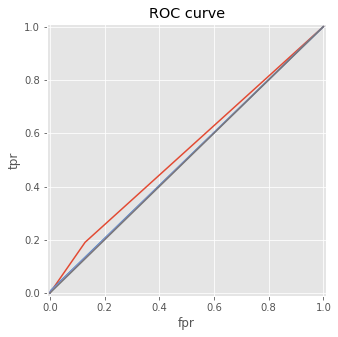

In [49]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
fpr, tpr, thresholds = roc_curve(y_test, predict[:])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_test, predict2[:])
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_test, predict3[:])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [54]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cross_val_score(
    dtc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

array([0.52394144, 0.52063063, 0.52626126, 0.5211039 , 0.55217087,
       0.53319964, 0.52288643, 0.53128979, 0.52587853, 0.5060797 ])

In [55]:
cross_val_score(
    rfc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

array([0.65217568, 0.63534685, 0.5694009 , 0.58652597, 0.62645513,
       0.6390056 , 0.60122231, 0.57934537, 0.61347266, 0.59145476])

In [56]:
cross_val_score(
    lrg,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

array([0.60056757, 0.62820721, 0.65624324, 0.62576659, 0.68971225,
       0.65848157, 0.62111208, 0.59488341, 0.64099276, 0.63823711])

In [50]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
X_train, X_test, y_train, y_test = train_test_split(df_X_test, v_y_test, test_size=0.3, random_state=42)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)

In [51]:
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.19516407599309155
recall 0.20323741007194246
accuracy 0.7967806841046278
f1 0.19911894273127753


In [52]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
roc_auc_score(y_test, predict[:])

0.5421344058273933

(-0.01, 1.01)

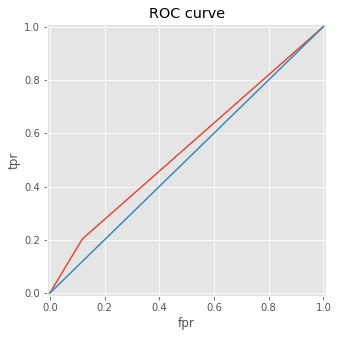

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, predict[:])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)